# Should Illinois Developers or Home Owners Install Solar Panel Systems?
This research project intends to provide both home builders and renovators in the state of Illinois with statistical analysis of the economic impact of building homes with solar panel systems, or adding solar panels to existing homes.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import random
import pickle
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Data Source
Data from x has been pickled etc...

In [107]:
with_df = pd.read_pickle("./with_df.pkl")
without_df = pd.read_pickle("./witho_df.pkl")
population_df = with_df.append(without_df, ignore_index=True)

In [109]:
print(with_df.shape)
print(without_df.shape)
print(population_df.shape)

(57, 9)
(2996, 9)
(3053, 9)


## Hypothesis 1: Homes with solar panel systems have a higher average value than homes in general.
This first test is to compare the average sale price of a subset of new and existing home sales that have solar panel systems, with the average sale price of home sales in general.

$$\large H_0\text{:   }\bar{x} \leq \mu$$
$$\large H_a\text{:   }\bar{x} > \mu$$

In [110]:
#population mean, var, and std
pop_mean = round(population_df['Sold Pr'].mean(), ndigits=2)
pop_var = round(population_df['Sold Pr'].var(), ndigits=2)
pop_std = round(population_df['Sold Pr'].std(), ndigits=2)

In [111]:
print(f'Population Mean: {pop_mean}')
print(f'Population Variance: {pop_var}')
print(f'Population Standard Deviation: {pop_std}')

Population Mean: 323531.65
Population Variance: 35527264626.19
Population Standard Deviation: 188486.78


In [112]:
#population mean, var, and std
sol_mean = round(with_df['Sold Pr'].mean(), ndigits=2)
sol_var = round(with_df['Sold Pr'].var(), ndigits=2)
sol_std = round(with_df['Sold Pr'].std(), ndigits=2)

In [113]:
print(f'Solar Mean: {sol_mean}')
print(f'Solar Variance: {sol_var}')
print(f'Solar Standard Deviation: {sol_std}')

Solar Mean: 417916.28
Solar Variance: 45801253328.96
Solar Standard Deviation: 214012.27


### Right Tail Z-Test

In [114]:
z = (sol_mean-pop_mean)/(pop_std/np.sqrt(57))
print(f'Z Score: {z}')

Z Score: 3.780574583184501


In [115]:
p_value = 1 - stats.norm.cdf(z)
alpha = 0.05
print(p_value)

7.823341836732389e-05


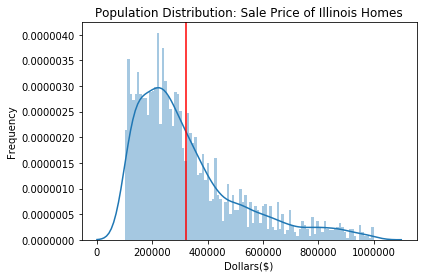

In [116]:
sns.distplot(population_df['Sold Pr'], bins=100)
plt.axvline(x=pop_mean, color='red')
plt.title("Population Distribution: Sale Price of Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('Frequency')
plt.plot()
plt.show()


### CLT Distribution

demonstrate how tests work; CLT is being used to check the test statistics, etc...

In [117]:
sample_means = []
for _ in range(1000):
    sample_means.append(round(np.random.choice(population_df['Sold Pr'], size=57).mean(), ndigits=2))

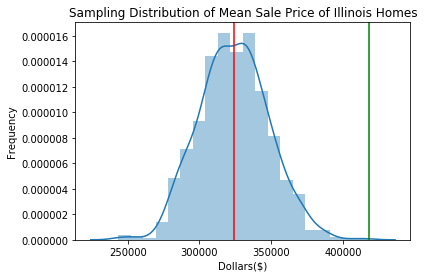

In [118]:
sns.distplot(sample_means, bins=20)
plt.axvline(x=np.mean(sample_means), color='red')
plt.axvline(x=sol_mean, color='green')
plt.title("Sampling Distribution of Mean Sale Price of Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('Frequency')

plt.plot()
plt.show()

In [119]:
count = 0
for mean in sample_means:
    if mean >= sol_mean:
        count += 1
count/len(sample_means)

0.0

## Conclusion + Accept/Reject
Outcome/results from test

## Hypothesis 2: Existing homes with solar panel systems spend less time on the market than existing homes in general.
The second test is to compare the average market time, in days, of existing homes with solar panels to existing homes without. 

$$\large H_0\text{:   }\bar{x} \geq \mu$$
$$\large H_a\text{:   }\bar{x} < \mu$$

In [192]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
population_df2 = population_df[(population_df['MT'] < 365) & (population_df['New'] == 0)]
population_df2.shape

(2440, 9)

In [193]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
with_df2 = with_df[(with_df['MT'] < 365) & (with_df['New'] == 0)]
with_df2.shape

(46, 9)

In [194]:
#population mean, var, and std
pop2_mean = round(population_df2['MT'].mean(), ndigits=2)
pop2_var = round(population_df2['MT'].var(), ndigits=2)
pop2_std = round(population_df2['MT'].std(), ndigits=2)

In [195]:
print(f'Population Mean: {pop2_mean}')
print(f'Population Variance: {pop2_var}')
print(f'Population Standard Deviation: {pop2_std}')

Population Mean: 164.35
Population Variance: 8967.74
Population Standard Deviation: 94.7


In [196]:
#population mean, var, and std
sol2_mean = round(with_df2['MT'].mean(), ndigits=2)
sol2_var = round(with_df2['MT'].var(), ndigits=2)
sol2_std = round(with_df2['MT'].std(), ndigits=2)

In [197]:
print(f'Solar Mean: {sol2_mean}')
print(f'Solar Variance: {sol2_var}')
print(f'Solar Standard Deviation: {sol2_std}')

Solar Mean: 82.52
Solar Variance: 6306.52
Solar Standard Deviation: 79.41


### Right Tailed One Sample T-Test

In [198]:
z2 = (sol2_mean-pop2_mean)/(pop2_std/np.sqrt(46))
print(f'Z Score: {z2}')

Z Score: -5.860592001258085


In [218]:
p_value2 = stats.norm.cdf(z2)
alpha2 = 0.05
print(p_value2)

2.30609959005168e-09


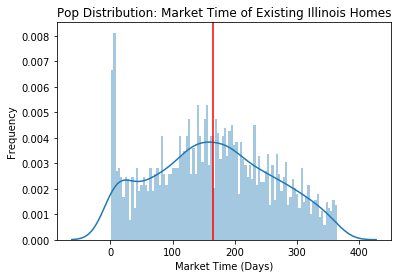

In [200]:
sns.distplot(population_df2['MT'], bins=100)
plt.axvline(x=pop2_mean, color='red')
plt.title("Pop Distribution: Market Time of Existing Illinois Homes")
plt.xlabel('Market Time (Days)')
plt.ylabel('Frequency')
plt.plot()
plt.show()

### CLT Distribution

In [201]:
sample_means2 = []
for _ in range(1000):
    sample_means2.append(round(np.random.choice(population_df2['MT'], size=46).mean(), ndigits=2))

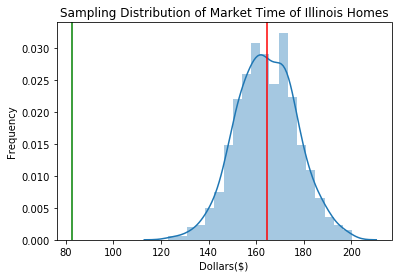

In [202]:
sns.distplot(sample_means2, bins=20)
plt.axvline(x=np.mean(sample_means2), color='red')
plt.axvline(x=sol2_mean, color='green')
plt.title("Sampling Distribution of Market Time of Existing Illinois Homes")
plt.xlabel('Dollars($)')
plt.ylabel('Frequency')

plt.plot()
plt.show()

In [203]:
count = 0
for mean in sample_means2:
    if mean <= sol2_mean:
        count += 1
count/len(sample_means2)

0.0

## Hypothesis 3: New construction homes with solar panel systems spend less time on the market than new construction homes without.
The second test is to compare the average market time, in days, of new homes with solar panels to new homes without. 

$$\large H_0\text{:   }\bar{x}_{w} \geq \bar{x}_{wo}$$
$$\large H_a\text{:   }\bar{x}_{w} < \bar{x}_{wo}$$

In [216]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
without_df3 = without_df[(without_df['MT'] < 365) & (without_df['New'] == 1)]
without_df3.shape

(155, 9)

In [217]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
with_df3 = with_df[(with_df['MT'] < 365) & (with_df['New'] == 1)]
with_df3.shape

(9, 9)

In [ ]:
#population mean, var, and std
pop2_mean = round(population_df2['MT'].mean(), ndigits=2)
pop2_var = round(population_df2['MT'].var(), ndigits=2)
pop2_std = round(population_df2['MT'].std(), ndigits=2)

In [215]:
print(f'Population Mean: {pop2_mean}')
print(f'Population Variance: {pop2_var}')
print(f'Population Standard Deviation: {pop2_std}')

Population Mean: 164.35
Population Variance: 8967.74
Population Standard Deviation: 94.7


In [ ]:
#population mean, var, and std
sol2_mean = round(with_df2['MT'].mean(), ndigits=2)
sol2_var = round(with_df2['MT'].var(), ndigits=2)
sol2_std = round(with_df2['MT'].std(), ndigits=2)

In [ ]:
print(f'Solar Mean: {sol2_mean}')
print(f'Solar Variance: {sol2_var}')
print(f'Solar Standard Deviation: {sol2_std}')

### Right Tailed Two Sample T-Test

## Hypothesis 4: Homes with solar panel systems have a final sale price closer to the original listing price when compared to homes in general.
The third test explores the theory that a home with solar panels captures a higher percentage of the original list price when finally sold (sale price).

$$\large H_0\text{:   }\bar{x} \leq \mu$$
$$\large H_a\text{:   }\bar{x} > \mu$$

In [204]:
#removing outliers from SP:OLP; any values outside 50-250%
population_df4 = population_df[(population_df['SP:OLP'] > .7) & (population_df['SP:OLP'] < 1.3)]
population_df4.shape

(3037, 9)

In [205]:
#removing outliers from SP:OLP; any values outside 50-250%
with_df4 = with_df[(with_df['SP:OLP'] > .7) & (with_df['SP:OLP'] < 1.3)]
with_df4.shape

(57, 9)

In [206]:
#population mean, var, and std
pop4_mean = round(population_df4['SP:OLP'].mean(), ndigits=4)
pop4_var = round(population_df4['SP:OLP'].var(), ndigits=4)
pop4_std = round(population_df4['SP:OLP'].std(), ndigits=4)

In [207]:
print(f'Population Mean: {pop4_mean}')
print(f'Population Variance: {pop4_var}')
print(f'Population Standard Deviation: {pop4_std}')

Population Mean: 0.964
Population Variance: 0.0024
Population Standard Deviation: 0.0487


In [208]:
#population mean, var, and std
sol4_mean = round(with_df4['SP:OLP'].mean(), ndigits=4)
sol4_var = round(with_df4['SP:OLP'].var(), ndigits=4)
sol4_std = round(with_df4['SP:OLP'].std(), ndigits=4)

In [209]:
print(f'Solar Mean: {sol4_mean}')
print(f'Solar Variance: {sol4_var}')
print(f'Solar Standard Deviation: {sol4_std}')

Solar Mean: 0.9788
Solar Variance: 0.0011
Solar Standard Deviation: 0.0335


### Right Tailed Z-Test

In [224]:
z4 = (sol4_mean-pop4_mean)/(pop4_std/np.sqrt(57))
print(f'Z Score: {z4}')

Z Score: 2.294405536796866


In [225]:
p_value4 = 1 - stats.norm.cdf(z4)
alpha4 = 0.05
print(p_value4)

0.010883607711595689


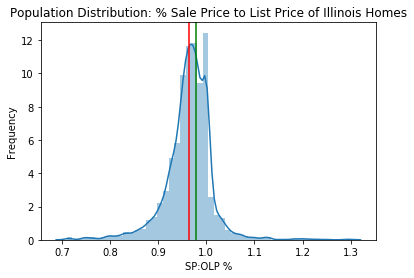

In [212]:
sns.distplot(population_df4['SP:OLP'], bins=50)
plt.axvline(x=pop4_mean, color='red')
plt.axvline(x=sol4_mean, color='green')
plt.title("Population Distribution: % Sale Price to List Price of Illinois Homes")
plt.xlabel('SP:OLP %')
plt.ylabel('Frequency')
plt.plot()
plt.show()
